### Joshua Koonce
# Credit Card Users Churn Prediction
## Features Selection, Model Selection, and Tuning


The objective of this project is to identify which features influence a customers decision to leave their credit cards and create an algorithm to predict customer churn with a high degree of accuracy.

Various credit cards charge an array of different fees, which are a source of income for banks but may also be contributing factors to customer churn.

Various models will be built and tuned for optimality using Random Search cross-validation approaches. The data will also be under and over sampled to see if it affects model performance.

The data in this dataset is as follows:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

Import staple data science libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Import the dataset

In [2]:
churn = pd.read_csv('BankChurners.csv')

In [3]:
churn.head(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [4]:
churn.shape

(10127, 21)

The dataset has 10,127 rows and 21 columns to start with.

Look at the data types for all columns

In [5]:
pd.DataFrame([churn.dtypes, churn.count()], index=['type', 'count']).T

,type,count
CLIENTNUM,int64,10127
Attrition_Flag,object,10127
Customer_Age,int64,10127
Gender,object,10127
Dependent_count,int64,10127
Education_Level,object,8608
Marital_Status,object,9378
Income_Category,object,10127
Card_Category,object,10127
Months_on_book,int64,10127


We have missing values in Education_Level and Marital_Status only.

Since they are categorical, rather than impute or guess and potentially cause bad data, we should drop the missing value rows since percentage-wise it won't be a huge hit

# Data Pre-Processing and Cleaning
### Includes cleaning from problems found later in the analysis

Printing the columns makes it easier to copy/paste into the cleaning code

In [6]:
churn['Months_on_book'].median()

36.0

In [7]:
# Drop unnecessary columns
if 'CLIENTNUM' in churn.columns:
    churn = churn.drop(['CLIENTNUM'], axis=1)

# Category Conversions can be done in one line
category_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
churn[category_vars] = churn[category_vars].astype('category')

# Income_Category has some entries labeled 'abc' that don't have a clear indicator which category they should be as all
# ordinal categories are accounted for; setting them to the most probable income class
churn['Income_Category'] = churn['Income_Category'].replace('abc', 'Less than $40K')

# Remove outliers in Customer_Age
churn.drop(labels=churn[churn['Customer_Age'] >= 67].index, inplace=True)

# Education_Level and Income_Category are categorical numeric, and ordered
from pandas.api.types import CategoricalDtype

churn['Education_Level'] = churn['Education_Level'].astype(CategoricalDtype(categories=['Uneducated', 'High School', 'College',
    'Graduate', 'Post-Graduate', 'Doctorate'], ordered=True))
churn['Income_Category'] = churn['Income_Category'].astype(CategoricalDtype(categories=['Less than $40K', '$40K - $60K', '$60K - $80K',
    '$80K - $120K', '$120K +', ], ordered=True))
churn['Card_Category'] = churn['Card_Category'].astype(CategoricalDtype(categories=['Blue', 'Silver', 'Gold',
    'Platinum'], ordered=True))

# Convert Attrition_Flag to 0s and 1s, with 1 representing a customer who churned
churn['Attrition_Flag'] = churn['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Drop NAs
churn.dropna(inplace=True)

In [8]:
churn['Attrition_Flag'].value_counts()

0    6710
1    1256
Name: Attrition_Flag, dtype: int64

Quick check of the ordinal categoricals:

In [9]:
churn['Education_Level'].head(0)

Series([], Name: Education_Level, dtype: category
Categories (6, object): ['Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' < 'Doctorate'])

In [10]:
churn['Income_Category'].head(0)

Series([], Name: Income_Category, dtype: category
Categories (5, object): ['Less than $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +'])

In [11]:
churn['Card_Category'].head(0)

Series([], Name: Card_Category, dtype: category
Categories (4, object): ['Blue' < 'Silver' < 'Gold' < 'Platinum'])

Check type and missing values again.

In [12]:
pd.DataFrame([churn.dtypes, churn.count()], index=['type', 'count']).T

,type,count
Attrition_Flag,int64,7966
Customer_Age,int64,7966
Gender,category,7966
Dependent_count,int64,7966
Education_Level,category,7966
Marital_Status,category,7966
Income_Category,category,7966
Card_Category,category,7966
Months_on_book,int64,7966
Total_Relationship_Count,int64,7966


The DataFrame is looking a lot cleaner now, with no missing values and data types corrected. 7,081 row remain.

Quick look at Categorical variables and their unique values to ensure we don't have any oddities:

In [13]:
[churn[column].value_counts(sort=False) for column in churn.columns if churn[column].dtypes.name == 'category']

[F    4221
 M    3745
 Name: Gender, dtype: int64,
 Uneducated       1377
 High School      1856
 College           939
 Graduate         2898
 Post-Graduate     473
 Doctorate         423
 Name: Education_Level, dtype: int64,
 Divorced     652
 Married     3992
 Single      3322
 Name: Marital_Status, dtype: int64,
 Less than $40K    3680
 $40K - $60K       1409
 $60K - $80K       1103
 $80K - $120K      1202
 $120K +            572
 Name: Income_Category, dtype: int64,
 Blue        7434
 Silver       428
 Gold          88
 Platinum      16
 Name: Card_Category, dtype: int64]

# Perform an Exploratory Data Analysis and Provide Insights

In [14]:
churn.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000,7966.000000
mean,0.157670,46.347477,2.330530,35.983430,3.821240,2.345719,2.457570,8592.351958,1164.771780,7427.580178,0.760558,4379.556741,64.726086,0.711866,0.276261
std,0.364454,8.085794,1.293701,8.041745,1.543406,1.003565,1.104528,9057.834550,813.118132,9062.398845,0.221771,3407.547238,23.573439,0.239627,0.275719
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2550.000000,444.000000,1325.000000,0.631000,2134.000000,45.000000,0.583000,0.025000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4525.000000,1281.000000,3457.000000,0.736000,3874.500000,67.000000,0.700000,0.178000
75%,0.000000,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,10973.000000,1783.750000,9800.500000,0.858000,4739.000000,81.000000,0.818000,0.503000
max,1.000000,66.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,138.000000,3.714000,0.999000


Most of the variables are fairly normally distributed. Age, Number of Trips, and Income appear to be clearly right-skewed.

### Univariate Distributions EDA

Let's get the distributions of each numeric variable. Many are discrete.

In [15]:
## Define a function to plot all variables distributions, and if possible, a boxplot to show outliers and skew

def plot_uv(df, column):
    print('\tUnivariate Analysis: ', col)
    
    if df[column].dtypes.name != 'category':
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

        # assigning a graph to each axis
        sns.boxplot(x=df[column], ax=ax_box)
        sns.histplot(data=df, x=column, ax=ax_hist)

        # Remove x axis name for the boxplot
        ax_box.set(xlabel='')
        plt.show()
    else:
        sns.histplot(data=df, x=column)
        plt.show()

	Univariate Analysis:  Attrition_Flag


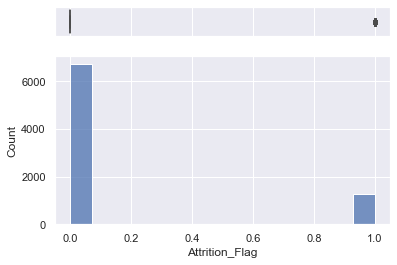

	Univariate Analysis:  Customer_Age


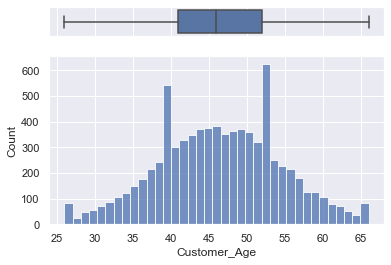

	Univariate Analysis:  Gender


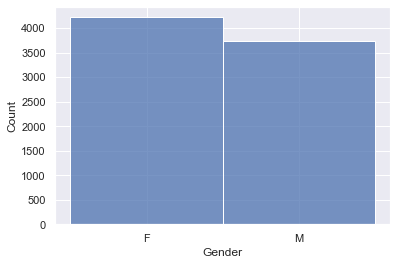

	Univariate Analysis:  Dependent_count


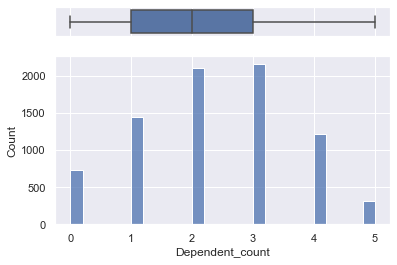

	Univariate Analysis:  Education_Level


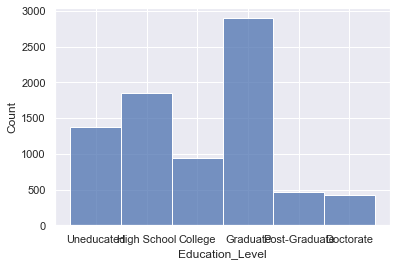

	Univariate Analysis:  Marital_Status


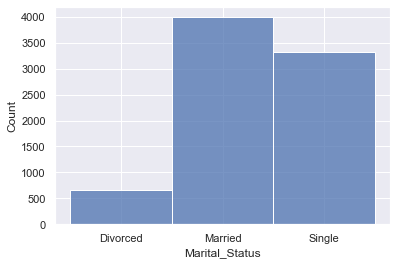

	Univariate Analysis:  Income_Category


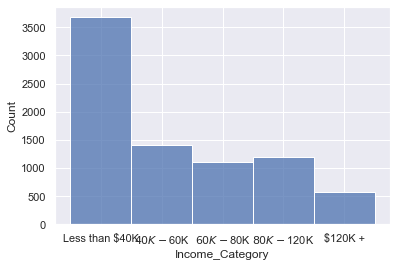

	Univariate Analysis:  Card_Category


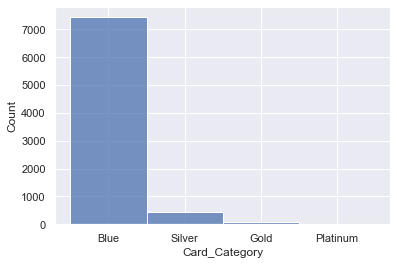

	Univariate Analysis:  Months_on_book


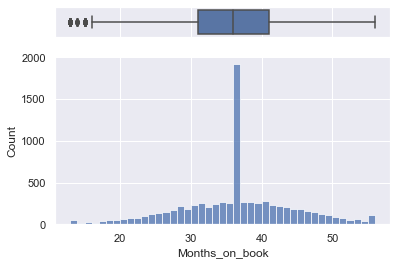

	Univariate Analysis:  Total_Relationship_Count


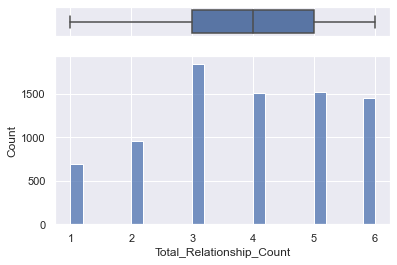

	Univariate Analysis:  Months_Inactive_12_mon


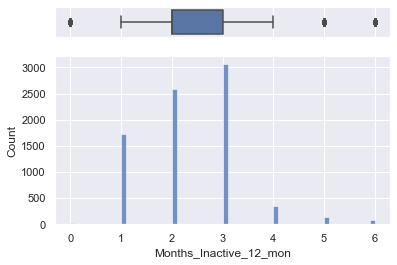

	Univariate Analysis:  Contacts_Count_12_mon


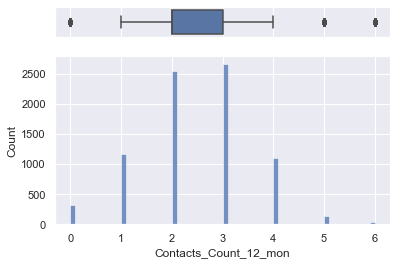

	Univariate Analysis:  Credit_Limit


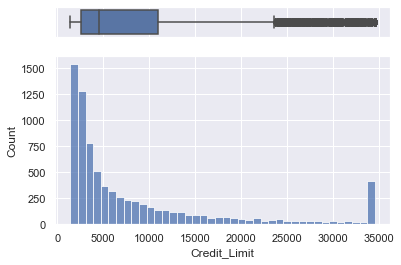

	Univariate Analysis:  Total_Revolving_Bal


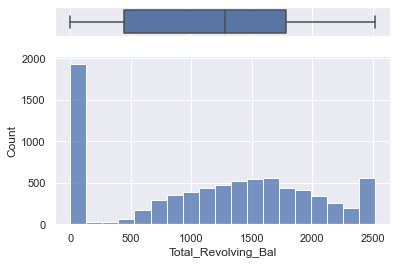

	Univariate Analysis:  Avg_Open_To_Buy


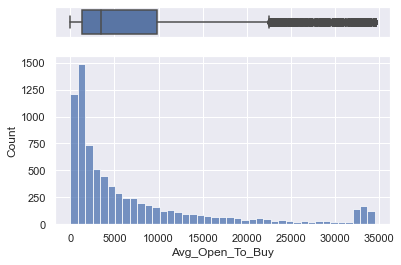

	Univariate Analysis:  Total_Amt_Chng_Q4_Q1


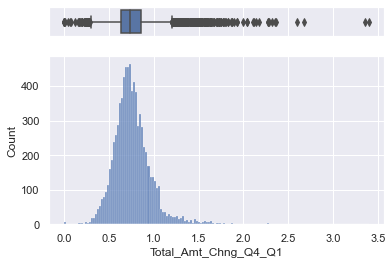

	Univariate Analysis:  Total_Trans_Amt


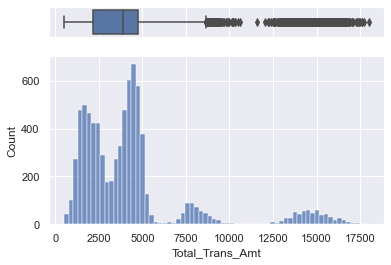

	Univariate Analysis:  Total_Trans_Ct


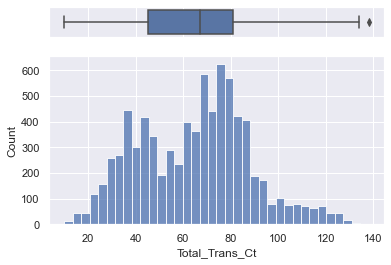

	Univariate Analysis:  Total_Ct_Chng_Q4_Q1


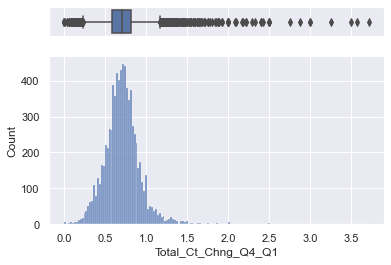

	Univariate Analysis:  Avg_Utilization_Ratio


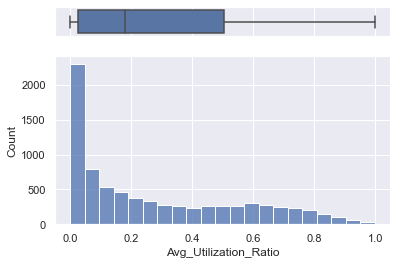

In [16]:
for col in churn.columns:
        plot_uv(churn, col)

- About 1/8th of the customers Attrited, so we have an imbalanced sample
- Average customer age is normally distributed and averages 46
- There seems to be a very high number of Months_on_book at 36, but since it's the median value, not sure any action needs to be taken
- Customer count tends to decrease as education increases, with the exception that the amount of Graduate level students with credit cards is the highest
- Number of customers in each category decreases as income increases, likely a function of income distribution norms
- Total_Trans_Amt seems to be a 4 mode distribution (likely 4 different normal distributions tied to another variable)
- Total_Trans_Ct seems to be bimodal, likely tied to another variable

### Plots of Individual Variables in Relation to Attrition_Flag

In [17]:
def plot_comp(df, column, comparison_var):
    print('\tResponse Analysis: ' + col + ' vs. ' + str(comparison_var))
    
    sns.histplot(x=df[column], hue=df[comparison_var]);
    plt.show()

	Response Analysis: Attrition_Flag vs. Attrition_Flag


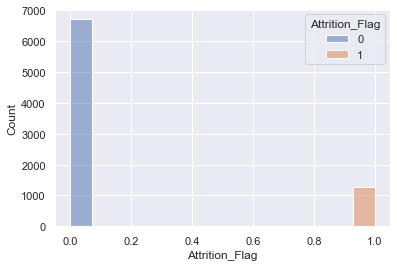

	Response Analysis: Customer_Age vs. Attrition_Flag


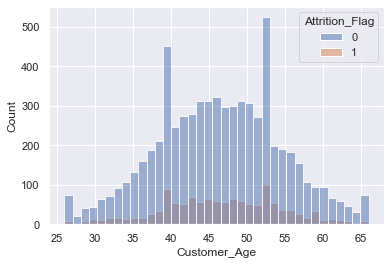

	Response Analysis: Gender vs. Attrition_Flag


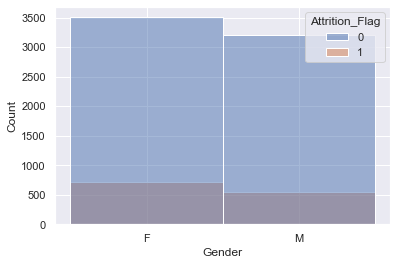

	Response Analysis: Dependent_count vs. Attrition_Flag


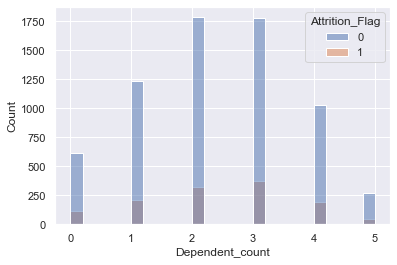

	Response Analysis: Education_Level vs. Attrition_Flag


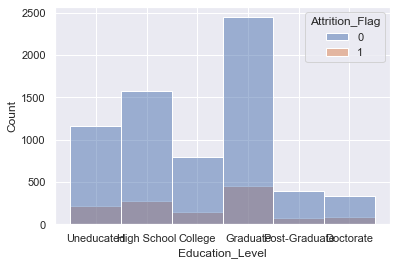

	Response Analysis: Marital_Status vs. Attrition_Flag


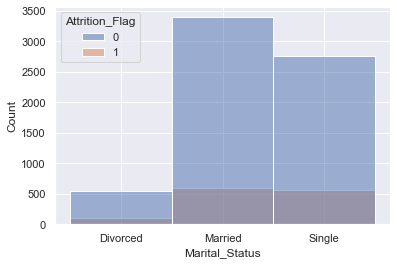

	Response Analysis: Income_Category vs. Attrition_Flag


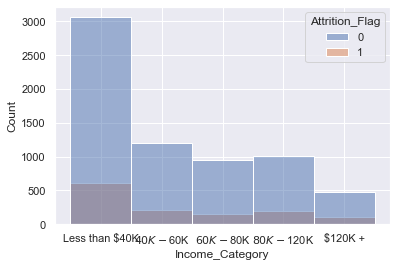

	Response Analysis: Card_Category vs. Attrition_Flag


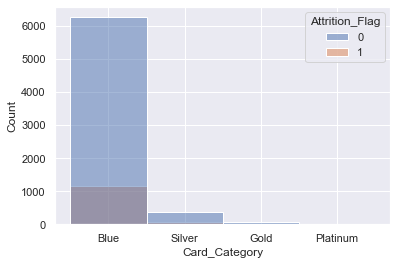

	Response Analysis: Months_on_book vs. Attrition_Flag


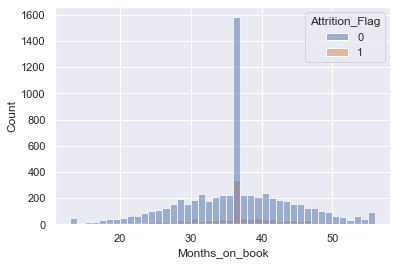

	Response Analysis: Total_Relationship_Count vs. Attrition_Flag


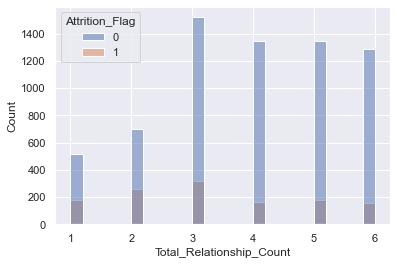

	Response Analysis: Months_Inactive_12_mon vs. Attrition_Flag


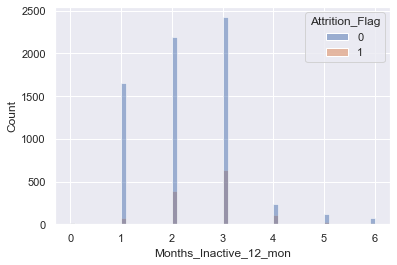

	Response Analysis: Contacts_Count_12_mon vs. Attrition_Flag


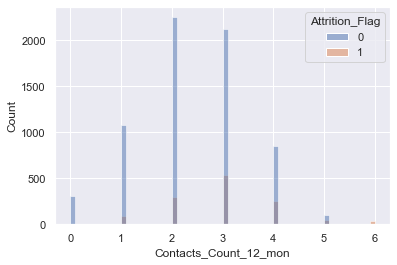

	Response Analysis: Credit_Limit vs. Attrition_Flag


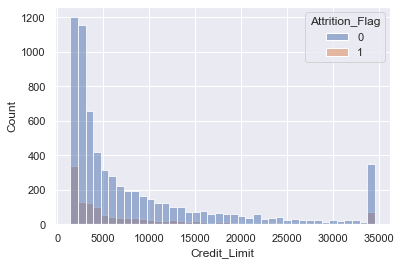

	Response Analysis: Total_Revolving_Bal vs. Attrition_Flag


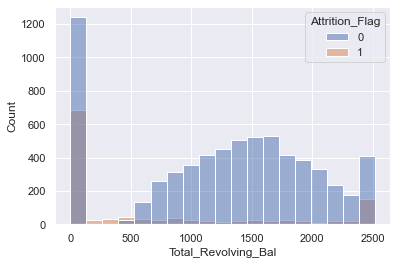

	Response Analysis: Avg_Open_To_Buy vs. Attrition_Flag


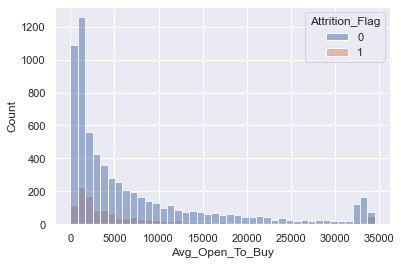

	Response Analysis: Total_Amt_Chng_Q4_Q1 vs. Attrition_Flag


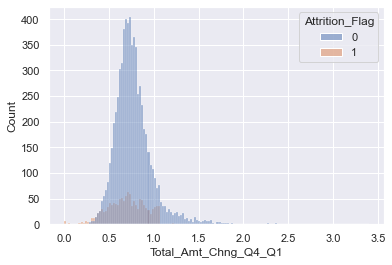

	Response Analysis: Total_Trans_Amt vs. Attrition_Flag


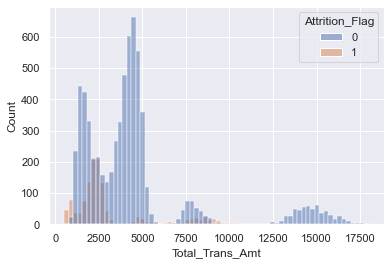

	Response Analysis: Total_Trans_Ct vs. Attrition_Flag


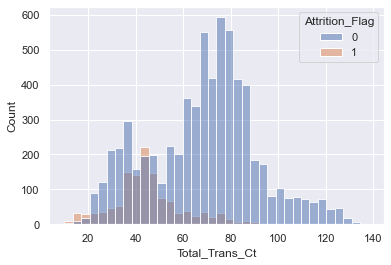

	Response Analysis: Total_Ct_Chng_Q4_Q1 vs. Attrition_Flag


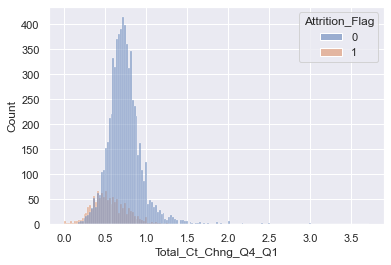

	Response Analysis: Avg_Utilization_Ratio vs. Attrition_Flag


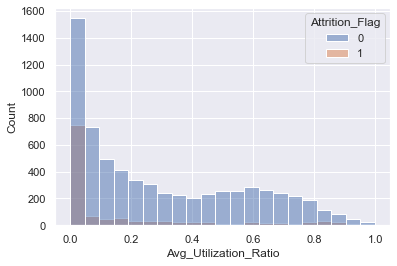

In [18]:
for col in churn.columns:
        plot_comp(churn, col, 'Attrition_Flag')

Insights based on Variables vs. Attrition:
- Many variables look unremarkable, the exceptions are:
 - Count-wise, most churn comes from customers with a 0% utilization ratio, or customers with low credit limits and low incomes, low transaction amounts, which look to be Blue card customers for the most part
 - There is also a high amount of attrition for those with a revolving balance of 2500 or higher. This is possibly due to transferring balances to other credit cards to work down debt.
 - Transaction count: Turnover centers around 45 transactions whereas customers that stay hover around 75 transactions

### Bi-variate and Univariate Distribution (PairPlot)

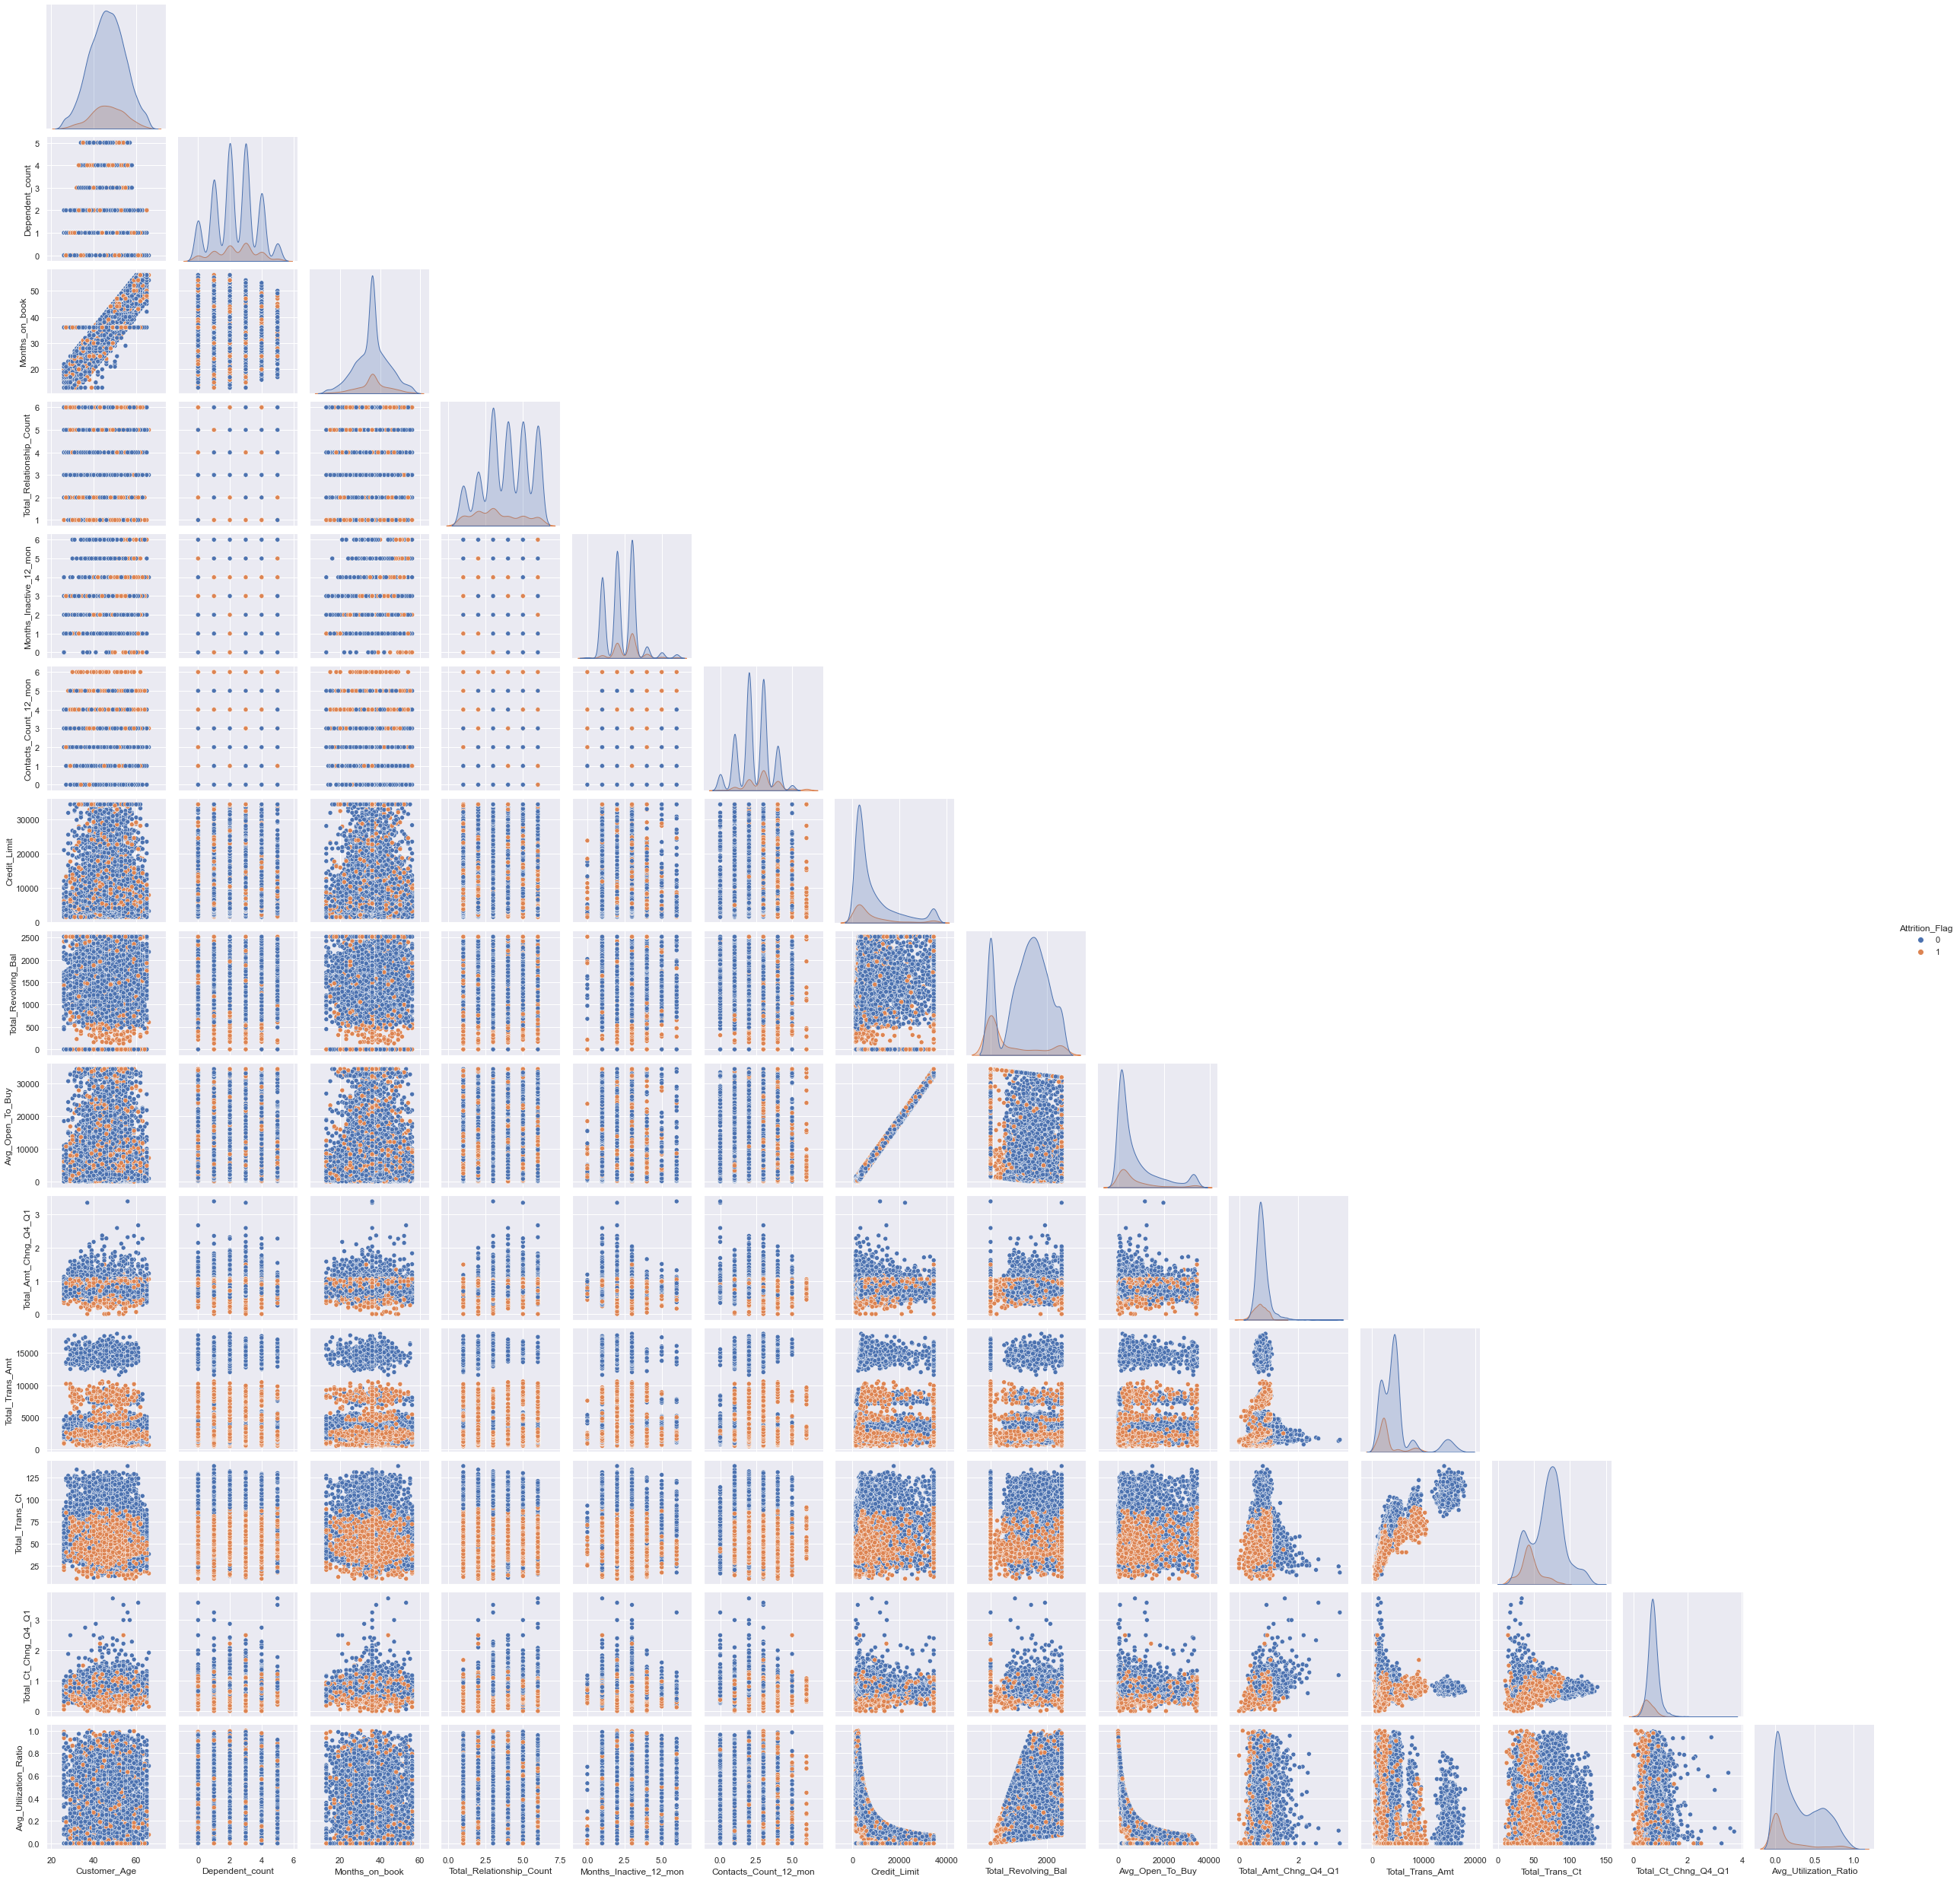

In [19]:
sns.pairplot(churn, corner=True, diag_kind='kde', hue='Attrition_Flag');

The pairplot highlights some interesting relationships, but mostly confirms the bivariate analysis.

There appear to be very strong clusters regarding churn. I imagine there will be a strong signal to noise ratio for the machine learning model to differentiate on.


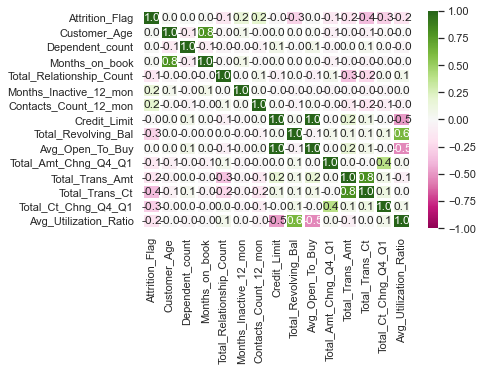

In [20]:
sns.heatmap(churn.corr(), vmin=-1, vmax=1, linewidths=2, annot=True, fmt='.1f', cmap='PiYG');

- Attrition_Flag (churn) is positively correlated to Months_Inactive and Contacts_Count and negatively correlated to Total_Revolving_Bal, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, and Avg_Utilization_Ratio.
- Months_on_book is strongly positively correlated to Customer_Age. It also has a large number of values at 36, but it appears to be normal.
- Avg_Utilization_Ratio is negatively correlated to Credit_Limit and Avg_Open_To_Buy and positively correlated to Total_Revolving_Bal
- Avg_Open_To_Buy is perfectly correlated to Credit_Limit and should be dropped for modeling

In [21]:
churn.drop(['Avg_Open_To_Buy'], axis=1, inplace=True)

# Model Building

#### For this business problem, I will use the Recall score as my primary metric of interest. 

#### In my opinion, we need to positively identify customers who are likely to churn so that we can see where our credit program is least successful. We can focus less on those classes of customers OR we can modify our credit program to suit the needs of that class of customer. Recall focuses on true positives identified out of total actual positives, in this case a "positive" is churn.

Note: Model performance will be commented on after all models have been built rather than after each model.

Establish Confusion Matrix Metrics function definition.

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics

# Define the scorer for grid search to be what is most important to us for the business case
scorer = metrics.make_scorer(metrics.recall_score)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix

In [23]:
# Define a function to return results when using KFold Cross Validation instead of standard test/train split

kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=1337)

def KFold_Metrics(model, kfold, x_train, y_train):
    
    scores = []
    
    # Calculate metrics on each pair of training/test folds and return the mean score
    acc = round(np.mean(cross_val_score(estimator=model, X=x_train, y=y_train, scoring='accuracy', cv=kfold, n_jobs=16)), 2)
    prec = round(np.mean(cross_val_score(estimator=model, X=x_train, y=y_train, scoring='precision', cv=kfold, n_jobs=16)), 2)
    rec = round(np.mean(cross_val_score(estimator=model, X=x_train, y=y_train, scoring='recall', cv=kfold, n_jobs=16)), 2)
    f1 = round(np.mean(cross_val_score(estimator=model, X=x_train, y=y_train, scoring='f1', cv=kfold, n_jobs=16)), 2)
    
    # Display to console
    print("KFold Training Set Metrics: KFold=", kfold.get_n_splits())
    print('Accuracy: ', acc)
    print('Precision: ', prec)
    print('Recall: ', rec)
    print('F1: ', f1)

    scores.extend((acc, prec, rec, f1))
    
    return scores

In [24]:
# Define a function to return results of a standard test/train
def CM_Metrics(model, train_targets, test_targets, train_pred, test_pred):
   
    scores = []
    
    train_acc = round(accuracy_score(train_targets, train_pred), ndigits=2)
    train_prec = round(precision_score(train_targets, train_pred), ndigits=2)
    train_rec = round(recall_score(train_targets, train_pred), ndigits=2)
    train_f1 = round(f1_score(train_targets, train_pred), ndigits=2)

    print("Training Set Metrics: ")
    print('Accuracy: ', train_acc)
    print('Precision: ', train_prec)
    print('Recall: ', train_rec)
    print('F1: ', train_f1)
    
    test_acc = round(accuracy_score(test_targets, test_pred), ndigits=2)
    test_prec = round(precision_score(test_targets, test_pred), ndigits=2)
    test_rec = round(recall_score(test_targets, test_pred), ndigits=2)
    test_f1 = round(f1_score(test_targets, test_pred), ndigits=2)

    scores.extend((test_acc, test_prec, test_rec, test_f1))

    print("\nTest Set Metrics: ")
    print('Accuracy: ', test_acc)
    print('Precision: ', test_prec)
    print('Recall: ', test_rec)
    print('F1: ', test_f1)
   
    print("\nConfusion Matrix for Test Metrics")
    # create the confusion matrix
    conf_matrix = confusion_matrix(test_targets, test_pred)
    
    # create the heatmap display
    heatmap = sns.heatmap(conf_matrix, cmap='magma', annot=True, fmt='d');
    heatmap.set_ylabel('actual')
    heatmap.set_xlabel('prediction')
    heatmap.plot()
    
    # print the heatmap with some indicator printouts since sklearn does its confusion matrix backwards
    print('\t\tTN\t\tFP\n')

    print('\t\tFN\t\tTP')
    
    return scores

Create dataframes to store the model score results:

In [25]:
model_scores = pd.DataFrame(columns=['acc', 'prec', 'rec', 'f1'])

In order to model, I want to create dummy variables for the categorical variables:

In [26]:
dummies = pd.get_dummies(churn[category_vars], drop_first=True)

churn2 = pd.concat([churn, dummies], axis=1)
churn2.drop(labels=category_vars, axis=1, inplace=True)

churn2.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,Education_Level_Doctorate,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_$120K +,Card_Category_Silver,Card_Category_Gold,Card_Category_Platinum
0,0,45,3,39,5,1,3,12691.0,777,1.335,...,0,1,0,0,1,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,1.541,...,0,0,1,0,0,0,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,2.594,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,2.175,...,0,1,0,0,1,0,0,0,0,0
5,0,44,2,36,3,1,2,4010.0,1247,1.376,...,0,1,0,1,0,0,0,0,0,0


## Features and Targets:  Train/Test Split

Lastly, I want to split the dataset into features and targets before I get to model building. These will get used for naive k-fold cross-validation.

In [27]:
x = churn2.drop(['Attrition_Flag'], axis=1)
y = churn2['Attrition_Flag']

print(len(x)/len(y))

1.0


The data is ready to feed into the modeling process.

In [28]:
y.value_counts()

0    6710
1    1256
Name: Attrition_Flag, dtype: int64

In [29]:
# Create a holdout dataset to split into train/test, set 20% aside for final test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, stratify=y, random_state=1337)

# Check the lengths of each set to ensure it worked
[len(x) for x in [x_train, x_test, y_train, y_test]]

[6372, 1594, 6372, 1594]

## Regularization: Scaling the Data

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
x_train.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Education_Level_High School', 'Education_Level_College',
       'Education_Level_Graduate', 'Education_Level_Post-Graduate',
       'Education_Level_Doctorate', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_$120K +', 'Card_Category_Silver', 'Card_Category_Gold',
       'Card_Category_Platinum'],
      dtype='object')

In [32]:
scale_vars = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [33]:
# disable chained assignments
pd.options.mode.chained_assignment = None 

x_train.loc[:, scale_vars] = scaler.fit_transform(x_train.loc[:, scale_vars])

In [34]:
x_test.loc[:, scale_vars] = scaler.transform(x_test.loc[:, scale_vars])

In [35]:
x_train.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Education_Level_Doctorate,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_$120K +,Card_Category_Silver,Card_Category_Gold,Card_Category_Platinum
5664,0.50,0.6,0.534884,0.8,0.333333,0.333333,0.000000,0.482320,0.233383,0.110666,...,0,1,0,0,0,0,0,0,0,0
3152,0.95,0.2,1.000000,0.4,0.166667,0.833333,0.034697,0.000000,0.188077,0.167286,...,0,0,1,0,0,0,0,0,0,0
7058,0.40,0.8,0.418605,0.8,0.166667,0.333333,0.006098,0.352801,0.213115,0.203832,...,0,1,0,0,0,0,0,0,0,0


In [36]:
x_test.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Education_Level_Doctorate,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_$120K +,Card_Category_Silver,Card_Category_Gold,Card_Category_Platinum
8302,0.600,0.4,0.744186,0.2,0.166667,0.000000,0.017616,0.626937,0.226826,0.273835,...,0,1,0,0,1,0,0,0,0,0
420,0.575,0.6,0.581395,1.0,0.500000,0.333333,0.022574,0.000000,0.216692,0.011724,...,0,1,0,0,0,0,0,0,0,0
1039,0.900,0.2,0.930233,0.4,0.166667,0.500000,0.000000,0.000000,0.208346,0.022419,...,0,1,0,0,0,0,0,0,0,0


## Logistic Regression

Fit the model:

In [37]:
# instantiate a classifier
lr = LogisticRegression(random_state=1337, max_iter=10000)

Fit Model using KFold Cross Validation and Check Metrics:

In [38]:
model_scores.loc['KFold Logistic Regression'] = KFold_Metrics(lr, kfold, x_train, y_train)

KFold Training Set Metrics: KFold= 6
Accuracy:  0.9
Precision:  0.8
Recall:  0.53
F1:  0.63


## Decision Tree

Create the model:

In [39]:
# instantiate a classifier
dt = DecisionTreeClassifier(random_state=1337)

Fit Model using KFold Cross Validation and Check Metrics:

In [40]:
model_scores.loc['KFold Decision Tree'] = KFold_Metrics(dt, kfold, x_train, y_train)

KFold Training Set Metrics: KFold= 6
Accuracy:  0.94
Precision:  0.79
Recall:  0.81
F1:  0.8


## Bagging Classifier (Bagged Tree)

Create the model:

In [41]:
# instantiate a classifier
bc = BaggingClassifier(random_state=1337)

Fit Model using KFold Cross Validation and Check Metrics:

In [42]:
model_scores.loc['KFold Bagged Tree'] = KFold_Metrics(bc, kfold, x_train, y_train)

KFold Training Set Metrics: KFold= 6
Accuracy:  0.95
Precision:  0.89
Recall:  0.81
F1:  0.85


## Random Forest Classifier

Create the model:

In [43]:
# instantiate a classifier
rf = RandomForestClassifier(random_state=1337)

Fit Model using KFold Cross Validation and Check Metrics:

In [44]:
model_scores.loc['KFold Random Forest'] = KFold_Metrics(rf, kfold, x_train, y_train)

KFold Training Set Metrics: KFold= 6
Accuracy:  0.96
Precision:  0.93
Recall:  0.78
F1:  0.85


### AdaBoost Classifier

Import additional classifiers needed for boosted approaches.

In [45]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

Create the model:

In [46]:
# instantiate a classifier
ab = AdaBoostClassifier(random_state=1337)

Fit Model using KFold Cross Validation and Check Metrics:

In [47]:
model_scores.loc['KFold AdaBoost'] = KFold_Metrics(ab, kfold, x_train, y_train)

KFold Training Set Metrics: KFold= 6
Accuracy:  0.95
Precision:  0.88
Recall:  0.82
F1:  0.85


### Gradient Boost Classifier

Create the model:

In [48]:
# instantiate a classifier
gb = GradientBoostingClassifier(random_state=1337)

Fit Model using KFold Cross Validation and Check Metrics:

In [49]:
model_scores.loc['KFold Gradient Boost'] = KFold_Metrics(gb, kfold, x_train, y_train)

KFold Training Set Metrics: KFold= 6
Accuracy:  0.96
Precision:  0.93
Recall:  0.83
F1:  0.88


### XGBoost Classifier


Fit the model:

In [50]:
# instantiate a classifier
xgb = XGBClassifier(random_state=1337, use_label_encoder=False, eval_metric='logloss')

Fit Model using KFold Cross Validation and Check Metrics:

In [51]:
model_scores.loc['KFold XGBoost'] = KFold_Metrics(xgb, kfold, x_train, y_train)

KFold Training Set Metrics: KFold= 6
Accuracy:  0.97
Precision:  0.92
Recall:  0.87
F1:  0.9


## Model Performance Evaluation (Untuned Models, Cross Validation)

In [52]:
model_scores

,acc,prec,rec,f1
KFold Logistic Regression,0.90,0.80,0.53,0.63
KFold Decision Tree,0.94,0.79,0.81,0.80
KFold Bagged Tree,0.95,0.89,0.81,0.85
KFold Random Forest,0.96,0.93,0.78,0.85
KFold AdaBoost,0.95,0.88,0.82,0.85
KFold Gradient Boost,0.96,0.93,0.83,0.88
KFold XGBoost,0.97,0.92,0.87,0.90


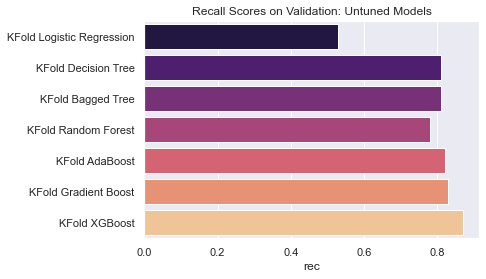

In [53]:
plt.title("Recall Scores on Validation: Untuned Models")
sns.barplot(x=model_scores.rec, y=model_scores.index, palette='magma', hue_order='rec', orient="h");

## Model Tuning: Random Search

I'll be using the top 2 models for Random Search optimization, then I'll use the Random Forest model as the third tuned model just so I'm not using all Boosted models.

### Tuned Random Forest

Fit the model (cross-validating within training set):

In [54]:
# hyperparameters
hp = {'max_samples': np.random.uniform(0.3, 1.0, size=5),
      'max_features': np.random.uniform(0.3, 1.0, size=5),
      'n_estimators': np.arange(20, 210, 10),
      'max_depth' : np.arange(2, 12, 2),
      'criterion': ['gini', 'entropy']}

rf_tuned = RandomizedSearchCV(estimator=rf, param_distributions=hp, n_iter=100, n_jobs=16, scoring=scorer, cv=kfold, random_state=1337)

Find the best model and report the final parameters:

In [55]:
%%time
rf_tuned.fit(x_train, y_train);
print("Best Parameters: ", rf_tuned.best_params_)
print("Best Recall Score: ", rf_tuned.best_score_)

Best Parameters:  {'n_estimators': 90, 'max_samples': 0.7750639786029803, 'max_features': 0.792871590631524, 'max_depth': 10, 'criterion': 'entropy'}
Best Recall Score:  0.8398203592814371
Wall time: 43 s


Make Predictions:

In [56]:
rft_pred_train = rf_tuned.predict(x_train)
rft_pred_test = rf_tuned.predict(x_test)

Check Metrics (Against Unseen Test Set)

Training Set Metrics: 
Accuracy:  0.99
Precision:  0.99
Recall:  0.97
F1:  0.98

Test Set Metrics: 
Accuracy:  0.97
Precision:  0.91
Recall:  0.88
F1:  0.89

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


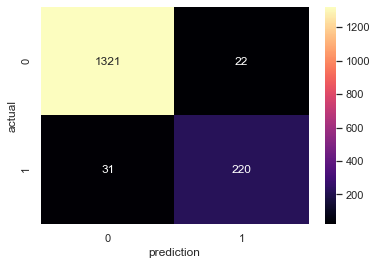

In [57]:
model_scores.loc['Tuned Random Forest'] = CM_Metrics(rf_tuned, y_train, y_test, rft_pred_train, rft_pred_test)

### Tuned AdaBoost

Fit the model (cross-validating within training set):

In [58]:
# hyperparameters
hp = {'algorithm': ['SAMME.R', 'SAMME'],
      'n_estimators': np.arange(20, 210, 10),
      'learning_rate' : [.01, .05, .1, .5, 1.0]}

ab_tuned = RandomizedSearchCV(estimator=ab, param_distributions=hp, n_iter=100, n_jobs=16, scoring=scorer, cv=kfold, random_state=1337)

In [59]:
%%time
ab_tuned.fit(x_train, y_train);
print("Best Parameters: ", ab_tuned.best_params_)
print("Best Recall Score: ", ab_tuned.best_score_)

Best Parameters:  {'n_estimators': 200, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Best Recall Score:  0.8458024427335804
Wall time: 26.9 s


Make Predictions:

In [60]:
abt_pred_train = ab_tuned.predict(x_train)
abt_pred_test = ab_tuned.predict(x_test)

Check Metrics (Against Unseen Test Set)

Training Set Metrics: 
Accuracy:  0.97
Precision:  0.92
Recall:  0.89
F1:  0.91

Test Set Metrics: 
Accuracy:  0.96
Precision:  0.88
Recall:  0.88
F1:  0.88

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


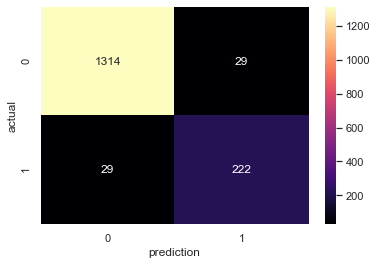

In [61]:
model_scores.loc['Tuned AdaBoost'] = CM_Metrics(ab_tuned, y_train, y_test, abt_pred_train, abt_pred_test)

### Tuned XGBoost

Fit the model (cross-validating within training set):

In [62]:
# hyperparameters
hp = {'n_estimators': np.arange(20, 210, 10),
      'learning_rate' : [.001, .01, .05, .1, .5, 1.0],
      'max_depth': np.arange(1, 11, 1),
      'max_delta_step': [.001, .01, .05, .1]}

xgb_tuned = RandomizedSearchCV(estimator=xgb, param_distributions=hp, n_iter=100, n_jobs=16, scoring=scorer, cv=kfold, random_state=1337)

In [63]:
%%time
xgb_tuned.fit(x_train, y_train);
print("Best Parameters: ", xgb_tuned.best_params_)
print("Best Score: ", xgb_tuned.best_score_)

Best Parameters:  {'n_estimators': 130, 'max_depth': 9, 'max_delta_step': 0.1, 'learning_rate': 1.0}
Best Score:  0.8756178119950575
Wall time: 34.2 s


Make Predictions:

In [64]:
xgbt_pred_train = xgb_tuned.predict(x_train)
xgbt_pred_test = xgb_tuned.predict(x_test)

Check Metrics (Against Unseen Test Set):

Training Set Metrics: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0

Test Set Metrics: 
Accuracy:  0.97
Precision:  0.92
Recall:  0.9
F1:  0.91

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


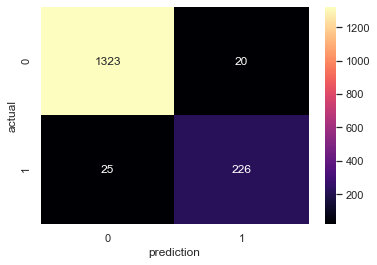

In [65]:
model_scores.loc['Tuned XGBoost'] = CM_Metrics(xgb_tuned, y_train, y_test, xgbt_pred_train, xgbt_pred_test)

## Model Performance Evaluation (Tuned Models)

In [66]:
model_scores

,acc,prec,rec,f1
KFold Logistic Regression,0.90,0.80,0.53,0.63
KFold Decision Tree,0.94,0.79,0.81,0.80
KFold Bagged Tree,0.95,0.89,0.81,0.85
KFold Random Forest,0.96,0.93,0.78,0.85
KFold AdaBoost,0.95,0.88,0.82,0.85
KFold Gradient Boost,0.96,0.93,0.83,0.88
KFold XGBoost,0.97,0.92,0.87,0.90
Tuned Random Forest,0.97,0.91,0.88,0.89
Tuned AdaBoost,0.96,0.88,0.88,0.88
Tuned XGBoost,0.97,0.92,0.90,0.91


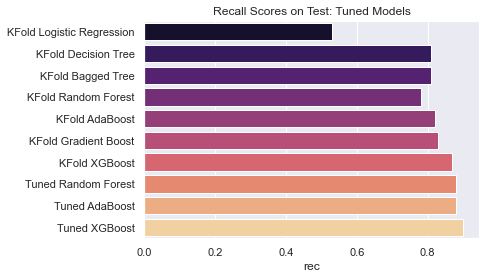

In [67]:
plt.title("Recall Scores on Test: Tuned Models")
sns.barplot(x=model_scores.rec, y=model_scores.index, orient="h", palette='magma', hue_order='rec');

# Model Building: Undersampling and Oversampling

Import libraries needed for resampling:

In [68]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Model Building: Oversampling using SMOTE

Create the oversampled dataset:

In [69]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1337)

x_train_ov, y_train_ov = sm.fit_resample(x_train, y_train)

In [70]:
print("Before oversampling, count of churn=1: {}".format(sum(y_train == 1)))
print("Before oversampling, count of churn=0: {} \n".format(sum(y_train == 0)))

print("After oversampling, count of churn=1: {}".format(sum(y_train_ov == 1)))
print("After oversampling, count of churn=0: {} \n".format(sum(y_train_ov == 0)))

print("After oversampling, the shape of train_x: {}".format(x_train_ov.shape))
print("After oversampling, the shape of train_y: {} \n".format(len(y_train_ov)))

Before oversampling, count of churn=1: 1005
Before oversampling, count of churn=0: 5367 

After oversampling, count of churn=1: 5367
After oversampling, count of churn=0: 5367 

After oversampling, the shape of train_x: (10734, 28)
After oversampling, the shape of train_y: 10734 



### Oversampled Tuned Random Forest Model

Fit the Model:

In [71]:
rf_tuned_ov = rf_tuned.fit(x_train_ov, y_train_ov)

Make Predictions:

In [72]:
rftov_pred_train = rf_tuned_ov.predict(x_train_ov)
rftov_pred_test = rf_tuned_ov.predict(x_test)

Check Metrics (Against Unseen Test Data):

Training Set Metrics: 
Accuracy:  0.99
Precision:  0.99
Recall:  0.99
F1:  0.99

Test Set Metrics: 
Accuracy:  0.96
Precision:  0.84
Recall:  0.91
F1:  0.87

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


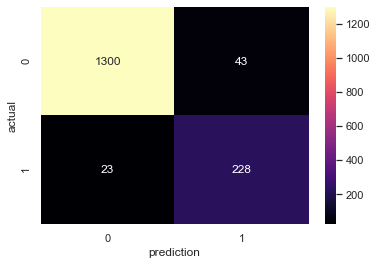

In [73]:
model_scores.loc['Oversampled Tuned Random Forest'] = CM_Metrics(rf_tuned_ov, y_train_ov, y_test, rftov_pred_train, rftov_pred_test)

### Oversampled Tuned AdaBoost

In [74]:
ab_tuned_ov = ab_tuned.fit(x_train_ov, y_train_ov)

Make Predictions:

In [75]:
abtov_pred_train = ab_tuned_ov.predict(x_train_ov)
abtov_pred_test = ab_tuned_ov.predict(x_test)

Check Metrics (Against Unseen Test Data):

Training Set Metrics: 
Accuracy:  0.98
Precision:  0.98
Recall:  0.98
F1:  0.98

Test Set Metrics: 
Accuracy:  0.96
Precision:  0.84
Recall:  0.93
F1:  0.88

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


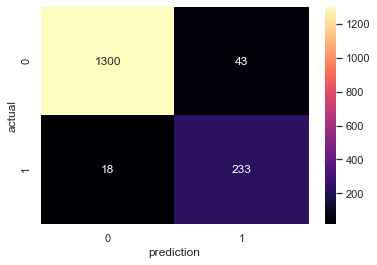

In [76]:
model_scores.loc['Oversampled Tuned AdaBoost'] = CM_Metrics(rf_tuned_ov, y_train_ov, y_test, abtov_pred_train, abtov_pred_test)

### Oversampled Tuned XGBoost

Fit the model:

In [77]:
xgb_tuned_ov = xgb_tuned.fit(x_train_ov, y_train_ov)

Make Predictions:

In [78]:
xgbtov_pred_train = xgb_tuned_ov.predict(x_train_ov)
xgbtov_pred_test = xgb_tuned_ov.predict(x_test)

Check Metrics (Against Unseen Test Data):

Training Set Metrics: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0

Test Set Metrics: 
Accuracy:  0.97
Precision:  0.9
Recall:  0.91
F1:  0.91

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


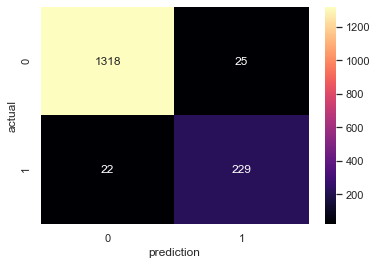

In [79]:
model_scores.loc['Oversampled Tuned XGBoost'] = CM_Metrics(xgb_tuned_ov, y_train_ov, y_test, xgbtov_pred_train, xgbtov_pred_test)

## Model Building: Undersampling

Create the undersampled data:

In [80]:
rus = RandomUnderSampler(random_state=1337)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

In [81]:
print("Before Under Sampling, count of churn=1: {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of churn=0: {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of churn=1: {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of churn=0: {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_x: {}".format(x_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(len(y_train_un)))

Before Under Sampling, count of churn=1: 1005
Before Under Sampling, count of churn=0: 5367 

After Under Sampling, count of churn=1: 1005
After Under Sampling, count of churn=0: 1005 

After Under Sampling, the shape of train_x: (2010, 28)
After Under Sampling, the shape of train_y: 2010 



### Undersampled Tuned Random Forest Model:

Fit the model:

In [82]:
rf_tuned_us = rf_tuned.fit(x_train_un, y_train_un)

Make Predictions:

In [83]:
rftus_pred_train = rf_tuned_us.predict(x_train_un)
rftus_pred_test = rf_tuned_us.predict(x_test)

Check Metrics (Against Unseen Test Data)

Training Set Metrics: 
Accuracy:  0.99
Precision:  0.99
Recall:  1.0
F1:  0.99

Test Set Metrics: 
Accuracy:  0.93
Precision:  0.72
Recall:  0.96
F1:  0.82

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


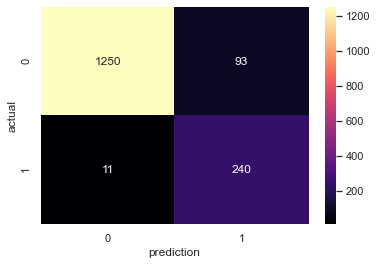

In [84]:
model_scores.loc['Undersampled Tuned Random Forest'] = CM_Metrics(rf_tuned_us, y_train_un, y_test, rftus_pred_train, rftus_pred_test)

### Undersampled Tuned AdaBoost Model:

Fit the model:

In [85]:
ab_tuned_us = ab_tuned.fit(x_train_un, y_train_un)

Make Predictions:

In [86]:
abtus_pred_train = ab_tuned_us.predict(x_train_un)
abtus_pred_test = ab_tuned_us.predict(x_test)

Check Metrics (Against Unseen Test Data):

Training Set Metrics: 
Accuracy:  0.96
Precision:  0.96
Recall:  0.97
F1:  0.96

Test Set Metrics: 
Accuracy:  0.93
Precision:  0.7
Recall:  0.96
F1:  0.81

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


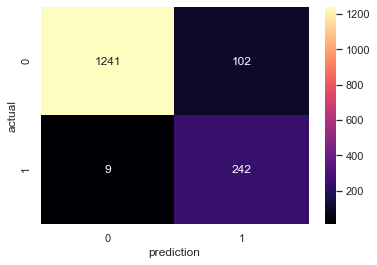

In [87]:
model_scores.loc['Undersampled Tuned AdaBoost'] = CM_Metrics(ab_tuned_us, y_train_un, y_test, abtus_pred_train, abtus_pred_test)

### Undersampled Tuned XGBoost Model:

Fit the model:

In [88]:
xgb_tuned_us = xgb_tuned.fit(x_train_un, y_train_un)

Make Predictions:

In [89]:
xgbtus_pred_train = xgb_tuned_us.predict(x_train_un)
xgbtus_pred_test = xgb_tuned_us.predict(x_test)

Check Metrics (Against Unseen Test Data):

Training Set Metrics: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0

Test Set Metrics: 
Accuracy:  0.94
Precision:  0.76
Recall:  0.96
F1:  0.85

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


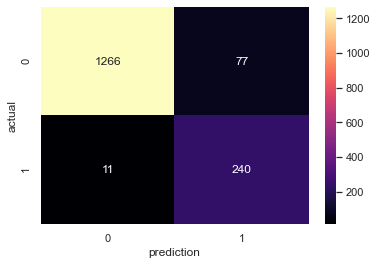

In [90]:
model_scores.loc['Undersampled Tuned XGBoost'] = CM_Metrics(xgb_tuned_us, y_train_un, y_test, xgbtus_pred_train, xgbtus_pred_test)

# Model Performance

In [91]:
model_scores

,acc,prec,rec,f1
KFold Logistic Regression,0.90,0.80,0.53,0.63
KFold Decision Tree,0.94,0.79,0.81,0.80
KFold Bagged Tree,0.95,0.89,0.81,0.85
KFold Random Forest,0.96,0.93,0.78,0.85
KFold AdaBoost,0.95,0.88,0.82,0.85
KFold Gradient Boost,0.96,0.93,0.83,0.88
KFold XGBoost,0.97,0.92,0.87,0.90
Tuned Random Forest,0.97,0.91,0.88,0.89
Tuned AdaBoost,0.96,0.88,0.88,0.88
Tuned XGBoost,0.97,0.92,0.90,0.91


Model performance sorted by Recall:

In [92]:
ms_sorted = model_scores.sort_values('rec')

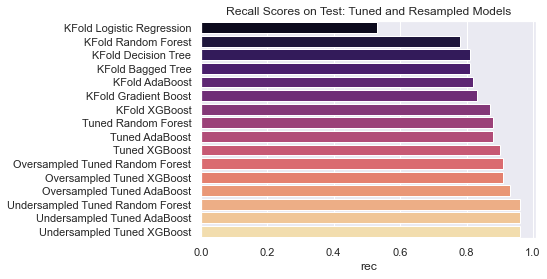

In [93]:
plt.title("Recall Scores on Test: Tuned and Resampled Models")
sns.barplot(data=ms_sorted, x='rec', y=ms_sorted.index, orient="h", palette='magma', hue_order='rec');

In [94]:
xgb_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0.1,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=130, n_jobs=24,
              num_parallel_tree=1, random_state=1337, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

# Productionize the Model: Create and Utilize a Pipeline

In [95]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    steps=[ ("Scale", MinMaxScaler()),
            ("XGBoost Tuned", XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
                  gamma=0, gpu_id=-1, importance_type='gain',
                  interaction_constraints='', learning_rate=1.0, max_delta_step=0.1,
                  max_depth=9, min_child_weight=1, n_estimators=130, n_jobs=24,
                  num_parallel_tree=1, random_state=1337, reg_alpha=0, reg_lambda=1,
                  scale_pos_weight=1, subsample=1, tree_method='exact',
                  use_label_encoder=False, validate_parameters=1, verbosity=None)
            )
          ])



In [96]:
# Recreate the test/train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, stratify=y, random_state=1337)

# Undersample it again (can't figure out how to do this within pipeline)
x_train_un, y_train_un = RandomUnderSampler(random_state=1337).fit_resample(x_train, y_train)

# Fit the model on training data
pipeline.fit(x_train_un, y_train_un)

Pipeline(steps=[('Scale', MinMaxScaler()),
                ('XGBoost Tuned',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=1.0,
                               max_delta_step=0.1, max_depth=9,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=130,
                               n_jobs=24, num_parallel_tree=1,
                               random_state=1337, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=None))])

Training Set Metrics: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0

Test Set Metrics: 
Accuracy:  0.94
Precision:  0.76
Recall:  0.96
F1:  0.85

Confusion Matrix for Test Metrics
		TN		FP

		FN		TP


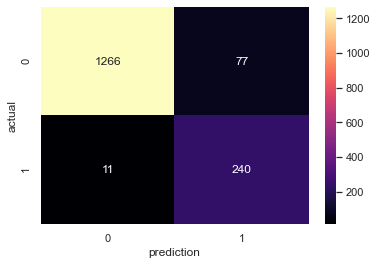

In [97]:
pred_train = pipeline.predict(x_train_un)
pred_test = pipeline.predict(x_test)

CM_Metrics(pipeline, y_train_un, y_test, pred_train, pred_test);

The above work has been replicated in a pipeline for the best model.

# Actionable Insights and Recommendations

Given the extremely high performance of the Undersampled Tuned XGBoost churn prediction model, I would recommend the company use this model to continually screen customer profiles and flag those that are at high risk for leaving the company's services. It achieves a >95% Recall, and it's accuracy is also outstanding.

The company can then target these customers with incentives or other marketing efforts in order to retain them as a customer, and keep bringing in revenue from them.

Alternatively the company could use this model to segment customers into hard-to-retain groups and potentially divest the services that have high turnover. It could then focus on it's low churn services instead.

Many customers who churn appear to carry little or no balance, so the company may be able to incentivize them to purchase items using their credit card as well by offering things like 0% interest on qualified purchases for a time period.